In [1]:
# importing libraries
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


C:\Users\rijul\anaconda3\envs\opencv_tutorials2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rijul\anaconda3\envs\opencv_tutorials2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rijul\anaconda3\envs\opencv_tutorials2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rijul\anaconda3\envs\opencv_

In [2]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


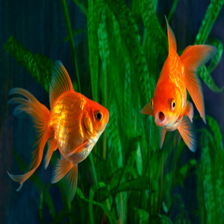

In [3]:
gold_fish = Image.open('E:/goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [4]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [5]:
gold_fish

array([[[0.00392157, 0.13333333, 0.15686275],
        [0.01176471, 0.12941176, 0.14901961],
        [0.00392157, 0.11372549, 0.12941176],
        ...,
        [0.        , 0.36862745, 0.11764706],
        [0.01568627, 0.40392157, 0.19215686],
        [0.02352941, 0.40784314, 0.23529412]],

       [[0.00392157, 0.1254902 , 0.15686275],
        [0.00392157, 0.12156863, 0.14509804],
        [0.        , 0.10980392, 0.1254902 ],
        ...,
        [0.00392157, 0.45882353, 0.18431373],
        [0.        , 0.40784314, 0.21960784],
        [0.00392157, 0.36470588, 0.22745098]],

       [[0.00784314, 0.1254902 , 0.16078431],
        [0.00392157, 0.11372549, 0.14117647],
        [0.        , 0.10196078, 0.12941176],
        ...,
        [0.01176471, 0.51764706, 0.23529412],
        [0.00392157, 0.44313725, 0.28627451],
        [0.        , 0.32156863, 0.23137255]],

       ...,

       [[0.07058824, 0.10588235, 0.1254902 ],
        [0.04705882, 0.10196078, 0.12941176],
        [0.03137255, 0

In [6]:
# adding dimensions
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
result

array([[ 0.2143701 ,  2.443436  , 10.434631  , ..., -1.9246414 ,
        -0.03401765, -0.05559317]], dtype=float32)

In [9]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [10]:
image_labels = []
with open("E:/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [11]:
image_labels[predicted_label_index]

'goldfish'

In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

In [13]:
data_dir

'.\\datasets\\flower_photos'

In [14]:
# convert path
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [15]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [17]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

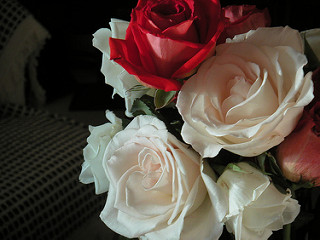

In [18]:
# open some images
Image.open(str(roses[1]))

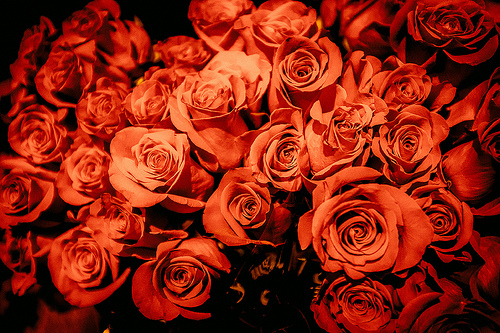

In [19]:
Image.open(str(roses[2]))

In [20]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

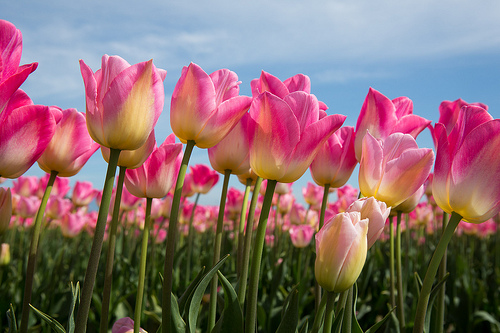

In [21]:
Image.open(str(tulips[3]))

In [22]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflower' : list(data_dir.glob('sunflower/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [23]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [24]:
flowers_images_dict['tulips']

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('datasets/flower_photos/tulips/110147301_ad921e2828.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112334842_3ecf7585dd.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112428665_d8f3632f36_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips

In [25]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower' : 3,
    'tulips' : 4,
}

In [26]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [27]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [28]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [31]:
X, y = [], []

for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [32]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [33]:
X[0]/255

array([[[0.        , 0.05882353, 0.02352941],
        [0.        , 0.05882353, 0.02352941],
        [0.        , 0.0627451 , 0.02745098],
        ...,
        [0.09411765, 0.2       , 0.12156863],
        [0.09803922, 0.20392157, 0.1254902 ],
        [0.10196078, 0.20784314, 0.12941176]],

       [[0.03137255, 0.08627451, 0.05490196],
        [0.03137255, 0.08627451, 0.05490196],
        [0.02745098, 0.08235294, 0.05490196],
        ...,
        [0.08235294, 0.18431373, 0.12156863],
        [0.09411765, 0.19215686, 0.13333333],
        [0.09803922, 0.2       , 0.1372549 ]],

       [[0.04705882, 0.08627451, 0.05882353],
        [0.04705882, 0.08627451, 0.05882353],
        [0.04313725, 0.08627451, 0.05490196],
        ...,
        [0.08235294, 0.16862745, 0.12156863],
        [0.09411765, 0.18039216, 0.12941176],
        [0.10196078, 0.18823529, 0.14117647]],

       ...,

       [[0.06666667, 0.11372549, 0.09803922],
        [0.05490196, 0.09803922, 0.07843137],
        [0.05098039, 0

In [34]:
X = np.array(X)
y = np.array(y)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [36]:
X_train_scaled = X_train/ 255
X_test_scaled = X_test / 255

In [37]:
X_train_scaled[0]

array([[[0.87058824, 0.90588235, 0.95686275],
        [0.87058824, 0.90588235, 0.95686275],
        [0.8745098 , 0.90980392, 0.96078431],
        ...,
        [0.62745098, 0.72941176, 0.79215686],
        [0.58823529, 0.69411765, 0.75686275],
        [0.55686275, 0.67058824, 0.72941176]],

       [[0.87058824, 0.90588235, 0.95686275],
        [0.87058824, 0.90588235, 0.95686275],
        [0.87058824, 0.90588235, 0.95686275],
        ...,
        [0.61568627, 0.71764706, 0.78431373],
        [0.58431373, 0.69019608, 0.75294118],
        [0.55686275, 0.67058824, 0.72941176]],

       [[0.8745098 , 0.90980392, 0.96078431],
        [0.87058824, 0.90980392, 0.95686275],
        [0.87058824, 0.90588235, 0.95294118],
        ...,
        [0.60392157, 0.70196078, 0.76862745],
        [0.58431373, 0.68627451, 0.75294118],
        [0.57254902, 0.6745098 , 0.74117647]],

       ...,

       [[0.89411765, 0.91764706, 0.9372549 ],
        [0.89411765, 0.9254902 , 0.94117647],
        [0.89411765, 0

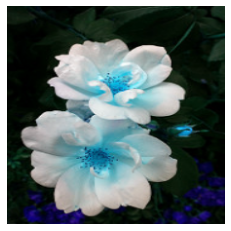

In [38]:
plt.axis('off')
plt.imshow(X[0])

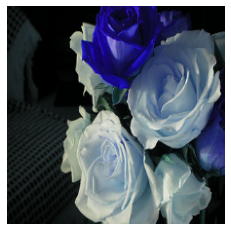

In [39]:
plt.axis('off')
plt.imshow(X[1])

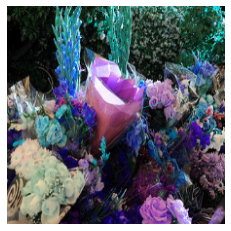

In [40]:
plt.axis('off')
plt.imshow(X[3])

In [42]:
predicted = classifier.predict(np.array([X[0],X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [43]:
image_labels[795]

'shower curtain'

In [44]:
image_labels[880]

'umbrella'

In [45]:
# retrain this model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224, 224, 3), trainable = False)


In [46]:
# create a model
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc'])

model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
2228/2228 [==============================] - 135s 61ms/sample - loss: 0.7140 - acc: 0.7078
Epoch 2/5
2228/2228 [==============================] - 124s 55ms/sample - loss: 0.3323 - acc: 0.8838
Epoch 3/5
2228/2228 [==============================] - 124s 56ms/sample - loss: 0.2567 - acc: 0.9125
Epoch 4/5
2228/2228 [==============================] - 121s 54ms/sample - loss: 0.2177 - acc: 0.9241
Epoch 5/5
2228/2228 [==============================] - 126s 57ms/sample - loss: 0.1853 - acc: 0.9399


In [48]:
model.evaluate(X_test_scaled, y_test)

743/743 [==============================] - 46s 62ms/sample - loss: 0.3304 - acc: 0.8896


[0.3303635780816123, 0.88963664]